# Seattle Airbnb Data 

## Motivation for this project 

We will be looking at the analysis of Seattle Airbnb Data for answering some interesting business questions.

We'll be using crisp-DM method for analysing the data and answering the business questions

This project is a part of udacity Data Scientist Nanodegree

### Importing libraries and reading the data

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
# reading the data into different data frames
calendar = pd.read_csv("calendar.csv")
listing = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

In [4]:
# setting the options to show all the columns of the dataframe
pd.options.display.max_columns = None 

In [5]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

### Basic Data Understanding
There are 3 tables in this data set each containing different attributes of airbnb listings

listing table : This contains details about a listing like gegraphical information, property type,are,region etc.

reviews table : This table contains reviews by customer for each of the listings

calendar table : This contains the information about the availability of listings in a year.

### Ques1. What is the trend for mean price of the listing for each month of the year

In [8]:
#Functions to be used for Data Preparation
def dollar_float(x):
    '''
    input: any column with dollar in the value
    output: value in float without the dollar sign
    '''
    if type(x)==str:
        x=x[1:].replace(",","")
        x=float(x)
    return x

def perc_float(x):
    '''
    input: %age value with string dtype
    output: %age value in float without %
    '''
    if type(x)==str:
        x=x.replace('%','')
        x=float(x)/100.0
    return (x)

In [12]:
# Remove $ sign from price column
calendar['price'] = calendar['price'].apply(lambda x:dollar_float(x))

# Convert available column to boolean
calendar["available"] = calendar["available"].map({"t": True, "f": False})

# Convert date column to datetime
calendar["date"] = pd.to_datetime(calendar["date"])

In [13]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN


In [17]:
# Filter the DataFrame to keep only records from years other than 2017
calendar = calendar[calendar['date'].dt.year != 2017]

In [18]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,True,85.0
1,241032,2016-01-05,True,85.0
2,241032,2016-01-06,False,NaN
3,241032,2016-01-07,False,NaN
4,241032,2016-01-08,False,NaN


In [19]:
# Extract year and month as string
calendar['year-month'] = calendar['date'].dt.strftime('%Y-%m')

In [20]:
calendar.head()

,listing_id,date,available,price,year-month
0,241032,2016-01-04,True,85.0,2016-01
1,241032,2016-01-05,True,85.0,2016-01
2,241032,2016-01-06,False,NaN,2016-01
3,241032,2016-01-07,False,NaN,2016-01
4,241032,2016-01-08,False,NaN,2016-01


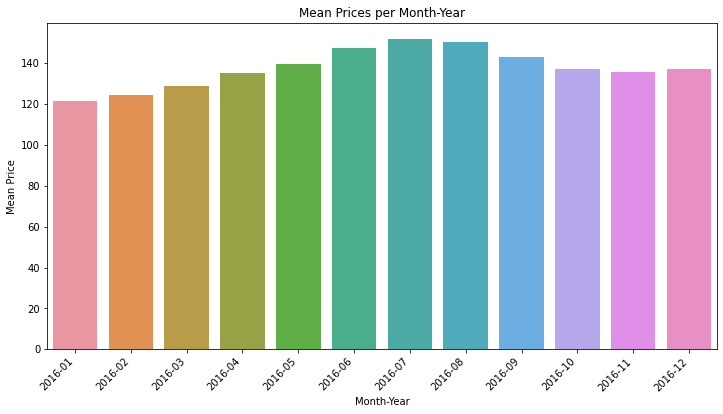

In [21]:
plt.figure(figsize=(12, 6))
# Group data by YEAR-MONTH and calculate sum of prices
grouped_data = calendar.groupby('year-month')['price'].mean().reset_index()

# Create a bar plot using Seaborn
sns.barplot(x='year-month', y='price', data=grouped_data)

# Customize plot (optional)
plt.xlabel("Month-Year")
plt.ylabel("Mean Price")
plt.title("Mean Prices per Month-Year")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

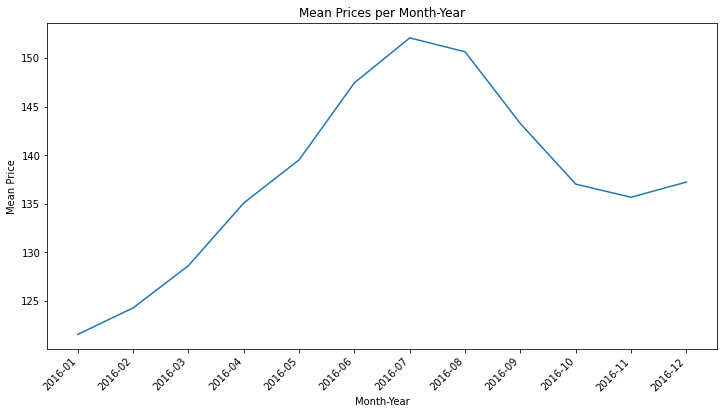

In [22]:
plt.figure(figsize=(12, 6))
# Group data by YEAR-MONTH and calculate sum of prices
grouped_data = calendar.groupby('year-month')['price'].mean().reset_index()

# Create a bar plot using Seaborn
sns.lineplot(x='year-month', y='price', data=grouped_data)

# Customize plot (optional)
plt.xlabel("Month-Year")
plt.ylabel("Mean Price")
plt.title("Mean Prices per Month-Year")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

### Ques 2
### How does the number of lisitings change through the months and is there a trend ?

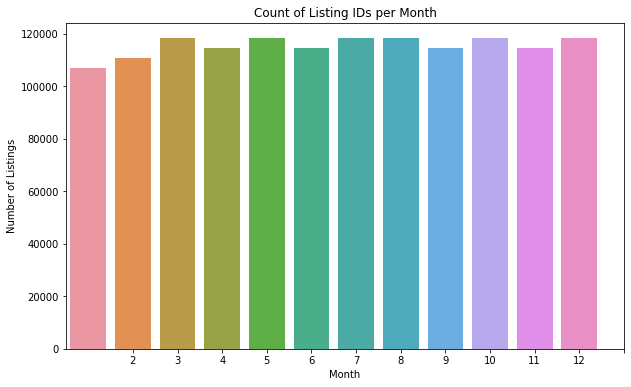

In [23]:
# Count listing_ids for each month
monthly_listing_counts = calendar.groupby(calendar['date'].dt.month)['listing_id'].count()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.barplot(x=monthly_listing_counts.index, y=monthly_listing_counts.values)

# Customize plot
plt.xlabel("Month")
plt.ylabel("Number of Listings")
plt.title("Count of Listing IDs per Month")
plt.xticks(range(1, 13))  # Set x-axis ticks for each month
plt.show()

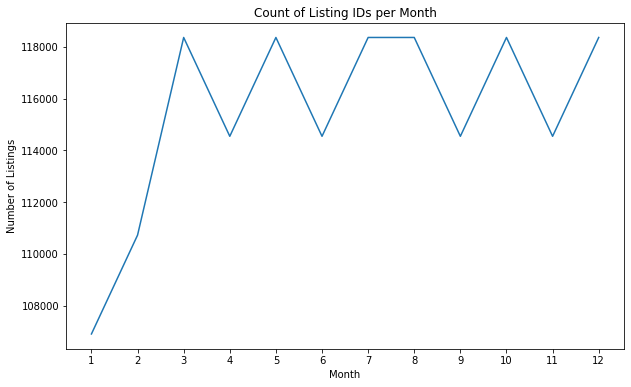

In [24]:
# Count listing_ids for each month
monthly_listing_counts = calendar.groupby(calendar['date'].dt.month)['listing_id'].count()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.lineplot(x=monthly_listing_counts.index, y=monthly_listing_counts.values)

# Customize plot
plt.xlabel("Month")
plt.ylabel("Number of Listings")
plt.title("Count of Listing IDs per Month")
plt.xticks(range(1, 13))  # Set x-axis ticks for each month
plt.show()

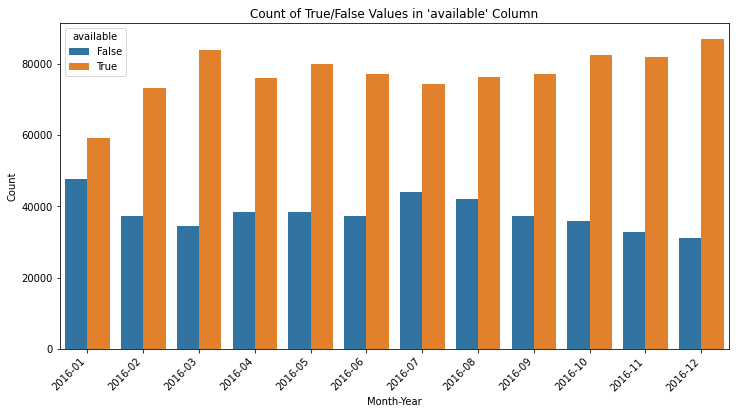

In [25]:
plt.figure(figsize=(12, 6))
# Create the countplot directly
sns.countplot(x='year-month', hue='available', data=calendar)

# Customize plot (optional)
plt.xlabel("Month-Year")
plt.ylabel("Count")
plt.title("Count of True/False Values in 'available' Column")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

### Ques 3
### Is there a relation between the trends of listing price and number of lisitngs each month ? 

C:\Users\HP\AppData\Local\Temp\ipykernel_10620\1661187196.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(calendar['year-month'].unique(), rotation=45, ha='right')  # Adjust rotation angle as needed


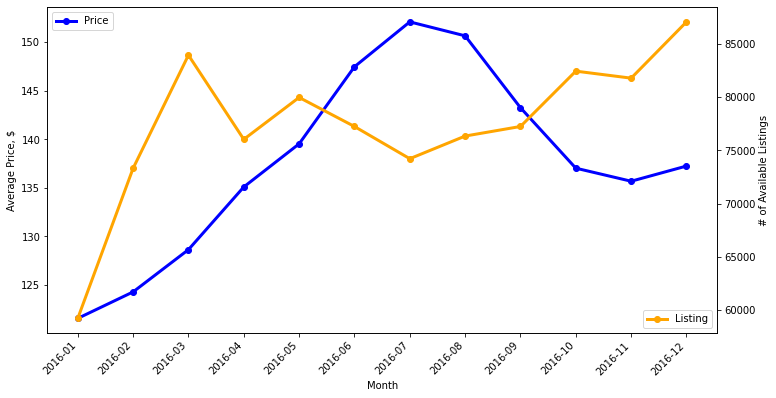

In [26]:
import matplotlib.pyplot as plt

# Assuming you have already imported the necessary libraries and have 'calendar' DataFrame

# Plot average price and total number of listings per month to see seasonal patterns
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figure size as needed
ax.plot(calendar.groupby(['year-month']).price.mean(), color='blue', marker='o', linewidth=3, label='Price')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price, $')

ax2 = ax.twinx()
ax2.plot(calendar.groupby(['year-month']).available.sum(), color='orange', marker='o', linewidth=3, label='Listing')
ax2.set_ylabel('# of Available Listings')

# Rotate x-tick labels
ax.set_xticklabels(calendar['year-month'].unique(), rotation=45, ha='right')  # Adjust rotation angle as needed

ax.legend(loc=2)
ax2.legend(loc=4)

plt.show()

### Ques 4 
### What are the top earning neighbourhoods ?

In [257]:
calendar.head()

,listing_id,date,available,price,year-month
0,241032,2016-01-04,True,85.0,2016-01
1,241032,2016-01-05,True,85.0,2016-01
2,241032,2016-01-06,False,NaN,2016-01
3,241032,2016-01-07,False,NaN,2016-01
4,241032,2016-01-08,False,NaN,2016-01


In [258]:
listing.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [259]:
# Select desired columns from listing DataFrame
listing_subset = listing[['id', 'neighbourhood_group_cleansed', 'host_id', 'property_type']]

# Merge calendar and listing DataFrames, keeping all columns from calendar
merged_df = pd.merge(calendar, listing_subset, how='left', left_on='listing_id', right_on='id')

# Drop the redundant 'id' column from listing
merged_df = merged_df.drop('id', axis=1)

In [260]:
merged_df.head()

,listing_id,date,available,price,year-month,neighbourhood_group_cleansed,host_id,property_type
0,241032,2016-01-04,True,85.0,2016-01,Queen Anne,956883,Apartment
1,241032,2016-01-05,True,85.0,2016-01,Queen Anne,956883,Apartment
2,241032,2016-01-06,False,NaN,2016-01,Queen Anne,956883,Apartment
3,241032,2016-01-07,False,NaN,2016-01,Queen Anne,956883,Apartment
4,241032,2016-01-08,False,NaN,2016-01,Queen Anne,956883,Apartment


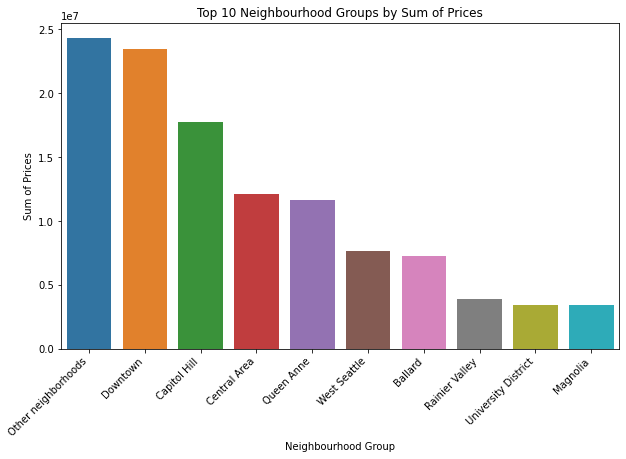

In [261]:
# Calculate sum of prices for each neighbourhood_group_cleansed
grouped_data = merged_df.groupby('neighbourhood_group_cleansed')['price'].sum().sort_values(ascending=False)

# Select top 10 neighbourhoods
top_10_neighbourhoods = grouped_data.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.barplot(x=top_10_neighbourhoods.index, y=top_10_neighbourhoods.values)

# Customize plot
plt.xlabel("Neighbourhood Group")
plt.ylabel("Sum of Prices")
plt.title("Top 10 Neighbourhood Groups by Sum of Prices")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

### Ques 5 
### What are the top earning Property Types ?

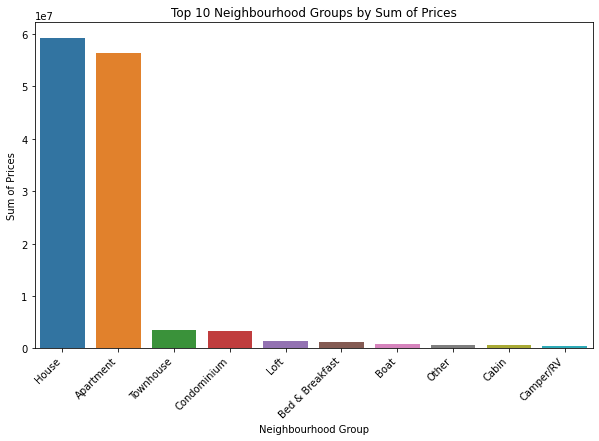

In [262]:
# Calculate sum of prices for each neighbourhood_group_cleansed
grouped_data = merged_df.groupby('property_type')['price'].sum().sort_values(ascending=False)

# Select top 10 neighbourhoods
top_10_neighbourhoods = grouped_data.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.barplot(x=top_10_neighbourhoods.index, y=top_10_neighbourhoods.values)

# Customize plot
plt.xlabel("Neighbourhood Group")
plt.ylabel("Sum of Prices")
plt.title("Top 10 Neighbourhood Groups by Sum of Prices")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

In [263]:
downtown_df = merged_df[merged_df.neighbourhood_group_cleansed == 'Downtown'].groupby('year-month')['price'].sum().reset_index()
downtown_df.head()

,year-month,price
0,2016-01,1334758.0
1,2016-02,1704880.0
2,2016-03,2134141.0
3,2016-04,2007068.0
4,2016-05,2204714.0


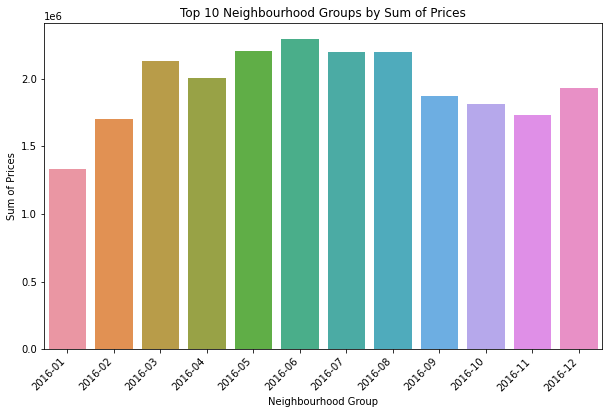

In [264]:
# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.barplot(x=downtown_df['year-month'], y=downtown_df.price)

# Customize plot
plt.xlabel("Neighbourhood Group")
plt.ylabel("Sum of Prices")
plt.title("Top 10 Neighbourhood Groups by Sum of Prices")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

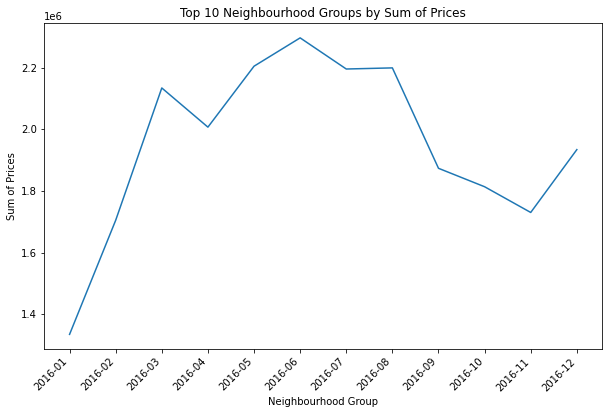

In [265]:
# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.lineplot(x=downtown_df['year-month'], y=downtown_df.price)

# Customize plot
plt.xlabel("Neighbourhood Group")
plt.ylabel("Sum of Prices")
plt.title("Top 10 Neighbourhood Groups by Sum of Prices")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

In [266]:
merged_df.head()

,listing_id,date,available,price,year-month,neighbourhood_group_cleansed,host_id,property_type
0,241032,2016-01-04,True,85.0,2016-01,Queen Anne,956883,Apartment
1,241032,2016-01-05,True,85.0,2016-01,Queen Anne,956883,Apartment
2,241032,2016-01-06,False,NaN,2016-01,Queen Anne,956883,Apartment
3,241032,2016-01-07,False,NaN,2016-01,Queen Anne,956883,Apartment
4,241032,2016-01-08,False,NaN,2016-01,Queen Anne,956883,Apartment


### Ques 6
### What is the average earning of a host & how does all the host perform w.r.t average ? 

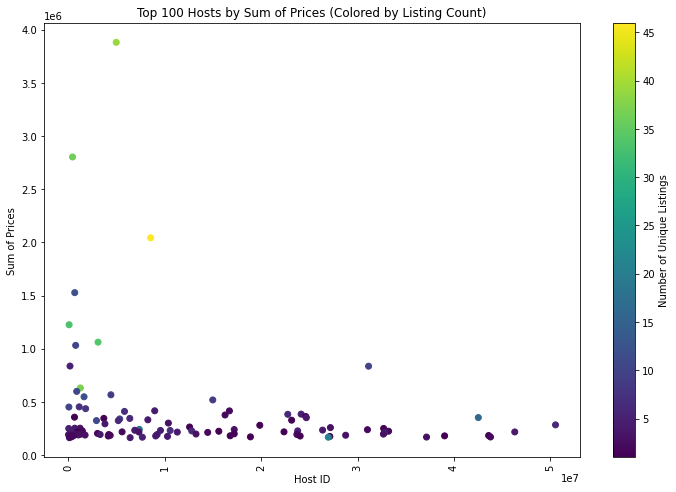

In [267]:
# Calculate sum of prices for each host_id
grouped_data = merged_df.groupby('host_id')['price'].sum()

# Sort by top 100 earners
top_100_hosts = grouped_data.sort_values(ascending=False).head(100)

# Calculate count of unique listing_ids for each host_id
unique_listings_per_host = merged_df.groupby('host_id')['listing_id'].nunique()

# Combine price sum and listing count for top 100 hosts
top_100_data = pd.merge(top_100_hosts, unique_listings_per_host, on='host_id')
top_100_data.columns = ['price_sum', 'listing_count']  # Rename columns for clarity

# Create a scatter plot with color representing listing count
plt.figure(figsize=(12, 8))
plt.scatter(top_100_data.index, top_100_data['price_sum'], c=top_100_data['listing_count'], cmap='viridis')

# Customize plot
plt.xlabel("Host ID")
plt.ylabel("Sum of Prices")
plt.title("Top 100 Hosts by Sum of Prices (Colored by Listing Count)")
plt.xticks(rotation=90)
plt.colorbar(label='Number of Unique Listings')  # Add colorbar for interpretation
plt.show()

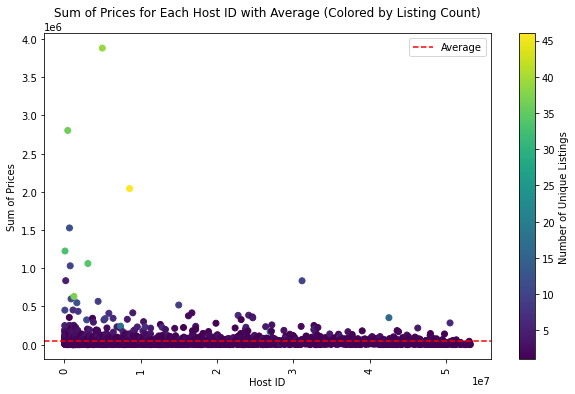

In [268]:
# Calculate sum of prices for each host_id
grouped_data = merged_df.groupby('host_id')['price'].sum()

# Calculate count of unique listing_ids for each host_id
unique_listings_per_host = merged_df.groupby('host_id')['listing_id'].nunique()

# Combine price sum, listing count, and average price sum
combined_data = pd.DataFrame({
    'price_sum': grouped_data.values,
    'listing_count': unique_listings_per_host.values,
    'average_price_sum': average_price_sum
}, index=grouped_data.index)

# Create a scatter plot with color representing listing count
plt.figure(figsize=(10, 6))
plt.scatter(combined_data.index, combined_data['price_sum'], c=combined_data['listing_count'], cmap='viridis')

# Add the average line (horizontal at the fixed average price sum)
plt.axhline(y=average_price_sum, color='r', linestyle='--', label='Average')

# Customize plot
plt.xlabel("Host ID")
plt.ylabel("Sum of Prices")
plt.title("Sum of Prices for Each Host ID with Average (Colored by Listing Count)")
plt.xticks(rotation=90)
plt.colorbar(label='Number of Unique Listings')  # Add colorbar for interpretation
plt.legend()
plt.show()

In [270]:
calendar.head()

,listing_id,date,available,price,year-month
0,241032,2016-01-04,True,85.0,2016-01
1,241032,2016-01-05,True,85.0,2016-01
2,241032,2016-01-06,False,NaN,2016-01
3,241032,2016-01-07,False,NaN,2016-01
4,241032,2016-01-08,False,NaN,2016-01


### Ques 8 
### What are some of the attributes which affects the price of a listing & can we predict the price for a listing using these attributes ? 

In [275]:
#Data preparation

#Removes rows missing price data since we are interested in price vairability
listing.dropna(subset=['price'],inplace=True)

#Convert dollar dtype to float
listing['price'] = listing['price'].apply(lambda x:dollar_float(x))
listing['monthly_price'] = listing['monthly_price'].apply(lambda x:dollar_float(x))
listing['weekly_price'] = listing['weekly_price'].apply(lambda x:dollar_float(x))
listing['security_deposit'] = listing['security_deposit'].apply(lambda x:dollar_float(x))
listing['cleaning_fee'] = listing['cleaning_fee'].apply(lambda x:dollar_float(x))
listing['extra_people'] = listing['extra_people'].apply(lambda x:dollar_float(x))

#Convert percent to float
listing['host_response_rate'] = listing['host_response_rate'].apply(lambda x:perc_float(x))

In [276]:
#Convert host_since to float days
listing['host_since'] = (pd.to_datetime('2017-02-01') - pd.to_datetime(listing['host_since'])) / np.timedelta64(1, 'D')

#By same token, we will convert last_scraped, first_review & last_review columns to float days
listing['last_scraped'] = (pd.to_datetime('2017-02-01') - pd.to_datetime(listing['last_scraped'])) / np.timedelta64(1, 'D')
listing['first_review'] = (pd.to_datetime('2017-02-01') - pd.to_datetime(listing['first_review'])) / np.timedelta64(1, 'D')
listing['last_review'] = (pd.to_datetime('2017-02-01') - pd.to_datetime(listing['last_review'])) / np.timedelta64(1, 'D')

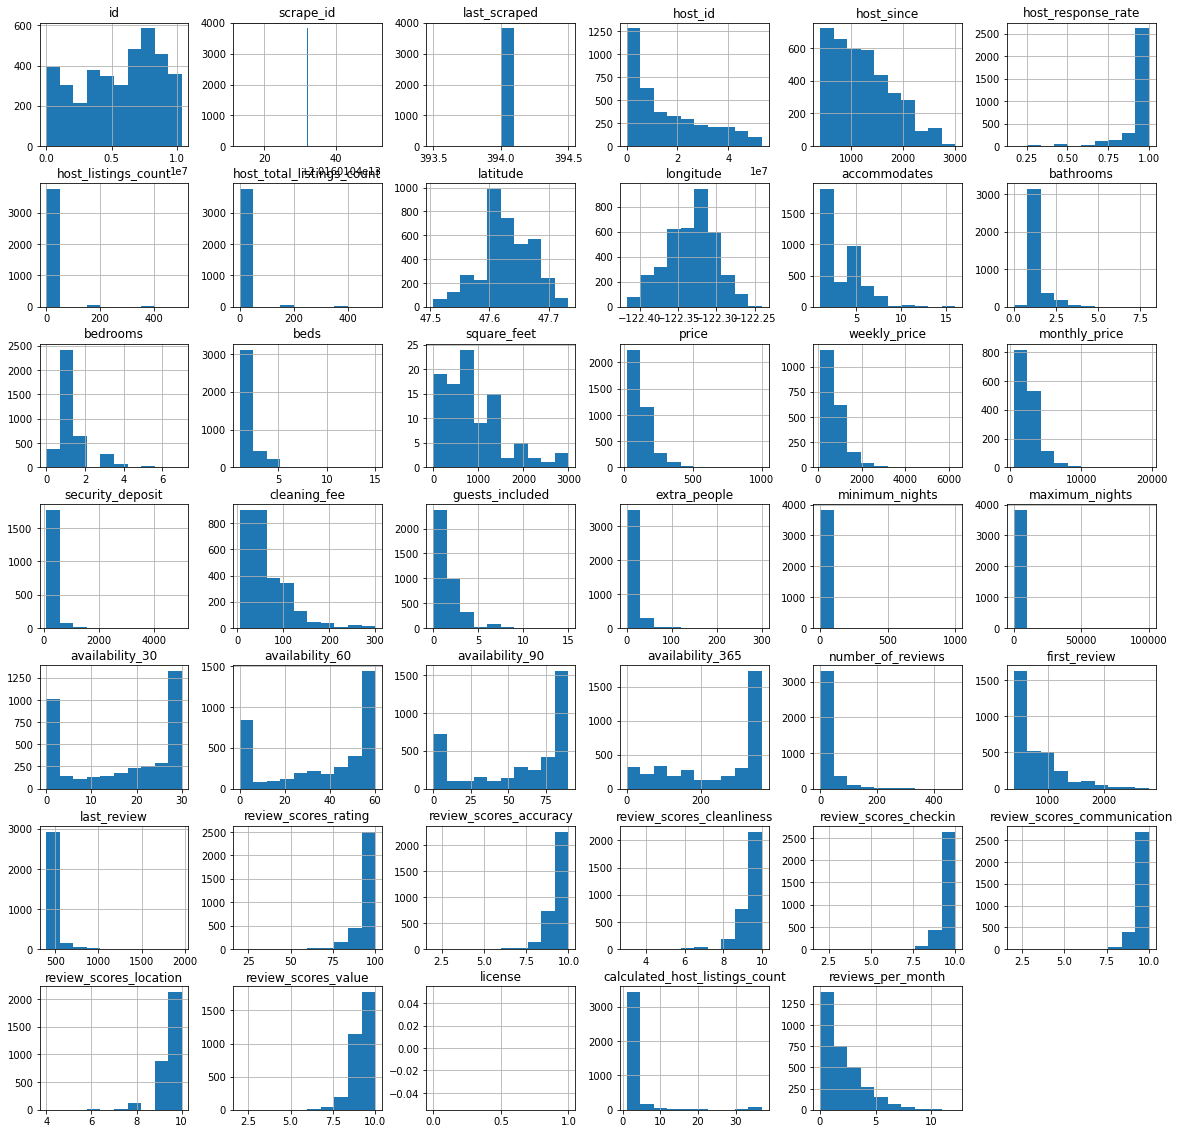

In [277]:
#check the distribution of each value
listing.hist(figsize=(20,20))
plt.show()

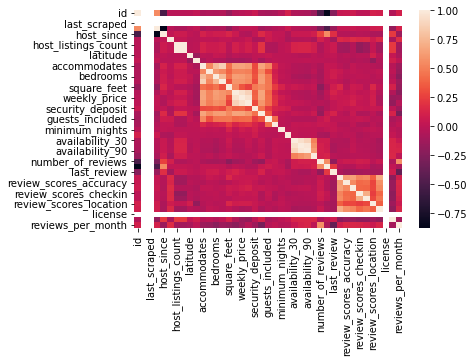

In [278]:
sns.heatmap(listing.corr())
plt.show()


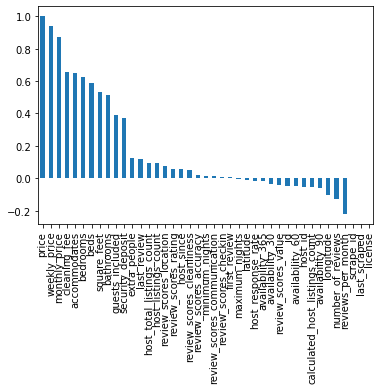

In [279]:
listing.corr()['price'].sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.show()

In [280]:
listing.corr()['reviews_per_month'].sort_values()

last_review                      -0.390974
cleaning_fee                     -0.303313
bedrooms                         -0.230287
price                            -0.218588
square_feet                      -0.176298
bathrooms                        -0.167894
beds                             -0.149079
accommodates                     -0.144150
host_since                       -0.142958
security_deposit                 -0.140299
weekly_price                     -0.131621
host_listings_count              -0.117272
host_total_listings_count        -0.117272
calculated_host_listings_count   -0.102007
latitude                         -0.084988
first_review                     -0.072065
minimum_nights                   -0.034225
maximum_nights                   -0.032458
monthly_price                    -0.030253
guests_included                  -0.028903
availability_365                  0.002312
longitude                         0.002583
extra_people                      0.004094
availabilit

## categorical values

In [281]:
listing.amenities.head()


0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

In [282]:
all_ame = []
for x in listing.amenities:
    all_ame.extend(x.replace('{','').replace('}','').replace('"','').split(','))
unique_ame = pd.unique(all_ame)
unique_ame


array(['TV', 'Cable TV', 'Internet', 'Wireless Internet',
       'Air Conditioning', 'Kitchen', 'Heating', 'Family/Kid Friendly',
       'Washer', 'Dryer', 'Free Parking on Premises',
       'Buzzer/Wireless Intercom', 'Smoke Detector',
       'Carbon Monoxide Detector', 'First Aid Kit', 'Safety Card',
       'Fire Extinguisher', 'Essentials', 'Pets Allowed',
       'Pets live on this property', 'Dog(s)', 'Cat(s)', 'Hot Tub',
       'Indoor Fireplace', 'Shampoo', 'Breakfast', '24-Hour Check-in',
       'Hangers', 'Hair Dryer', 'Iron', 'Laptop Friendly Workspace',
       'Suitable for Events', 'Elevator in Building',
       'Lock on Bedroom Door', 'Wheelchair Accessible', 'Gym', '', 'Pool',
       'Smoking Allowed', 'Other pet(s)', 'Doorman', 'Washer / Dryer'],
      dtype=object)

In [283]:
#create matrix
zero_matrix = np.zeros((len(listing),len(unique_ame)))
dummies_ame = pd.DataFrame(zero_matrix,columns=unique_ame)

In [284]:
#fill the matrix
for i,ame in enumerate(listing.amenities):
    indices = dummies_ame.columns.get_indexer(ame.replace('{','').replace('}','').replace('"','').split(','))
    dummies_ame.iloc[i,indices]=1
dummies_ame

,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer,Free Parking on Premises,Buzzer/Wireless Intercom,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Safety Card,Fire Extinguisher,Essentials,Pets Allowed,Pets live on this property,Dog(s),Cat(s),Hot Tub,Indoor Fireplace,Shampoo,Breakfast,24-Hour Check-in,Hangers,Hair Dryer,Iron,Laptop Friendly Workspace,Suitable for Events,Elevator in Building,Lock on Bedroom Door,Wheelchair Accessible,Gym,,Pool,Smoking Allowed,Other pet(s),Doorman,Washer / Dryer
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3814,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3815,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3816,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: >

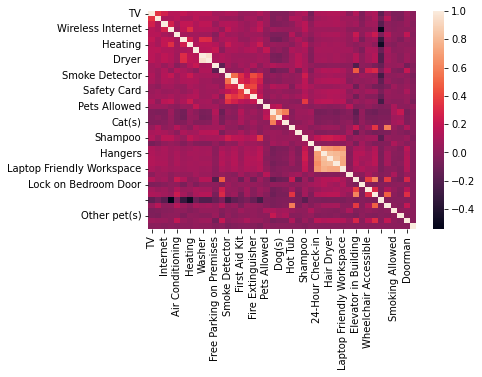

In [285]:
sns.heatmap(dummies_ame.corr())

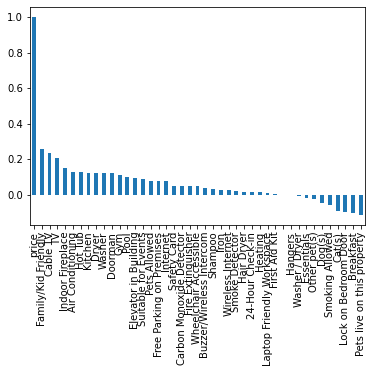

In [286]:
listing_ame_price = pd.concat([listing['price'],dummies_ame],axis=1)
listing_ame_price.corr()['price'].sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.show()

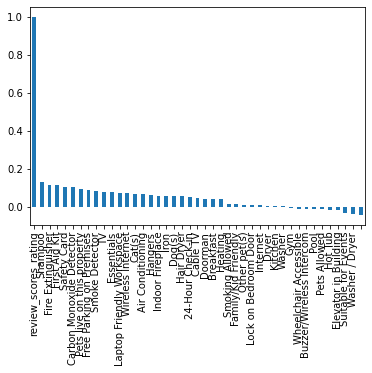

In [287]:
listing_ame_review = pd.concat([listing['review_scores_rating'],dummies_ame],axis=1)
listing_ame_review.corr()['review_scores_rating'].sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.show()

In [288]:
listing.host_verifications.head()

0                 ['email', 'phone', 'reviews', 'kba']
1    ['email', 'phone', 'facebook', 'linkedin', 're...
2     ['email', 'phone', 'google', 'reviews', 'jumio']
3    ['email', 'phone', 'facebook', 'reviews', 'jum...
4     ['email', 'phone', 'facebook', 'reviews', 'kba']
Name: host_verifications, dtype: object

In [289]:
all_h_ver = []
for x in listing.host_verifications:
    all_h_ver.extend(x.replace('[','').replace(']','').replace("'",'').replace(" ","").split(','))
unique_h_ver = pd.unique(all_h_ver)
unique_h_ver

array(['email', 'phone', 'reviews', 'kba', 'facebook', 'linkedin',
       'jumio', 'google', 'manual_offline', 'amex', 'manual_online',
       'sent_id', 'photographer', '', 'None', 'weibo'], dtype=object)

In [290]:
#create matrix
zero_matrix = np.zeros((len(listing),len(unique_h_ver)))
dummies_h_ver = pd.DataFrame(zero_matrix,columns=unique_h_ver)

In [291]:
#fill the matrix
for i,ver in enumerate(listing.host_verifications):
    indices = dummies_h_ver.columns.get_indexer(ver.replace('[','').replace(']','').replace("'",'').replace(" ","").split(','))
    dummies_h_ver.iloc[i,indices]=1
dummies_h_ver

,email,phone,reviews,kba,facebook,linkedin,jumio,google,manual_offline,amex,manual_online,sent_id,photographer,,None,weibo
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3814,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3815,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3816,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: >

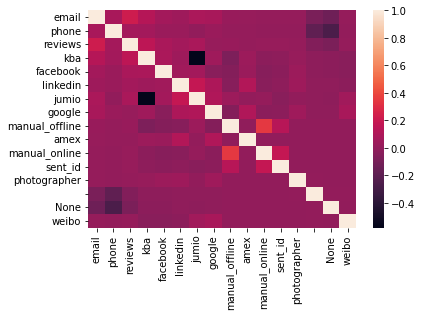

In [292]:
sns.heatmap(dummies_h_ver.corr())

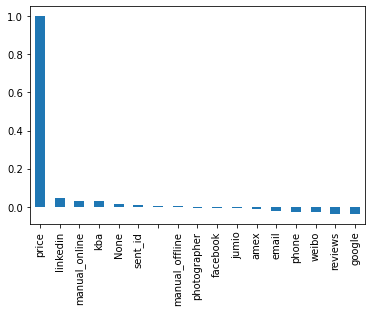

In [293]:
listing_ver_price = pd.concat([listing['price'],dummies_h_ver],axis=1)
listing_ver_price.corr()['price'].sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.show()

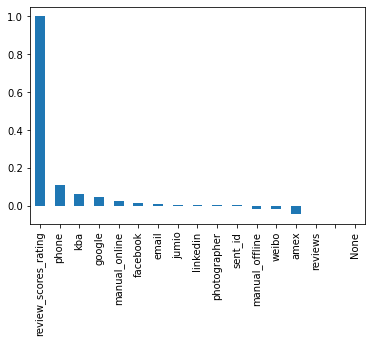

In [294]:
listing_ver_review = pd.concat([listing['review_scores_rating'],dummies_h_ver],axis=1)
listing_ver_review.corr()['review_scores_rating'].sort_values(ascending=False).plot.bar()
plt.xticks(rotation=90)
plt.show()

In [295]:
listing_cat = listing.select_dtypes(include=['object'])
listing_cat.nunique().sort_values(ascending=False)

listing_url                         3818
picture_url                         3818
name                                3792
description                         3742
medium_url                          3498
xl_picture_url                      3498
thumbnail_url                       3498
summary                             3478
amenities                           3284
space                               3119
host_url                            2751
host_thumbnail_url                  2743
host_picture_url                    2743
transit                             2574
neighborhood_overview               2506
host_about                          2011
notes                               1999
host_name                           1466
street                              1442
host_location                        120
host_verifications                   116
host_neighbourhood                   102
neighbourhood_cleansed                87
neighbourhood                         81
calendar_updated

In [296]:
#Take a look at address related data
col_address = ['street','host_location', 'host_neighbourhood', 'neighbourhood_cleansed', 'neighbourhood', 
         'neighbourhood_group_cleansed','zipcode', 'city','state']
listing[col_address].describe()

,street,host_location,host_neighbourhood,neighbourhood_cleansed,neighbourhood,neighbourhood_group_cleansed,zipcode,city,state
count,3818,3810,3518,3818,3402,3818,3811,3818,3818
unique,1442,120,102,87,81,17,28,7,2
top,"1st Avenue, Seattle, WA 98101, United States","Seattle, Washington, United States",Capitol Hill,Broadway,Capitol Hill,Other neighborhoods,98122,Seattle,WA
freq,30,3259,405,397,351,794,420,3810,3817


In [297]:
for col in col_address:
    if col == 'street':
        continue
    elif col == 'host_location':
        continue
    else:
        print(listing[col].value_counts())

Capitol Hill          405
Belltown              254
Ballard               210
Minor                 191
Queen Anne            189
                     ... 
Northwest District      1
Beverly Hills           1
Long Beach              1
Baldwin Hills           1
East Village            1
Name: host_neighbourhood, Length: 102, dtype: int64
Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
Pinehurst              4
South Beacon Hill      4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64
Capitol Hill          351
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
Pike Market             2
South Park              2
North College Park      1
Fairmount Park          1
Roxhill                 1
Name: neighbourhood, Length: 81, dtype: int64


In [298]:
# Select categorical variables for analysis
col_cat = ['neighbourhood_group_cleansed','property_type','calendar_updated',
          'smart_location','bed_type','host_response_time','cancellation_policy','room_type',
           'instant_bookable','is_location_exact','require_guest_profile_picture','host_identity_verified',
           'host_has_profile_pic','host_is_superhost','host_acceptance_rate','require_guest_phone_verification']

In [299]:
#crate dummies columns for the above selected categorical colums
dummies_cat = pd.get_dummies(listing[col_cat],prefix_sep='_',drop_first=True, dummy_na=False)
dummies_cat.shape

(3818, 89)

### Modelling/ Price Prediction

In [300]:
df_list_price = listing['price']
df_list_price = pd.concat([df_list_price, dummies_cat],axis=1)

In [301]:
df_list_price.corr()['price'].sort_values(ascending=False)[df_list_price.corr()['price'].sort_values()>0].head(11)


price                                      1.000000
cancellation_policy_strict                 0.226632
calendar_updated_13 months ago             0.145122
bed_type_Real Bed                          0.126372
neighbourhood_group_cleansed_Downtown      0.117590
neighbourhood_group_cleansed_Queen Anne    0.093789
calendar_updated_today                     0.086081
property_type_Boat                         0.078404
neighbourhood_group_cleansed_Magnolia      0.070174
require_guest_profile_picture_t            0.063297
calendar_updated_5 months ago              0.060952
Name: price, dtype: float64

In [302]:
df_list_price.corr()['price'].sort_values()[df_list_price.corr()['price'].sort_values()<0].head(10)


room_type_Private room                             -0.387502
room_type_Shared room                              -0.158473
host_acceptance_rate_100%                          -0.130585
host_response_time_within an hour                  -0.114852
cancellation_policy_moderate                       -0.102123
bed_type_Futon                                     -0.085925
neighbourhood_group_cleansed_Rainier Valley        -0.083340
neighbourhood_group_cleansed_Delridge              -0.072000
neighbourhood_group_cleansed_University District   -0.069133
neighbourhood_group_cleansed_Beacon Hill           -0.065915
Name: price, dtype: float64

(0.0, 400.0)

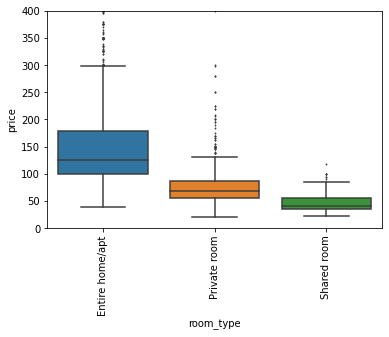

In [303]:
# Entire houses have higher average price.
ax = sns.boxplot(data=listing, x='room_type',y='price',fliersize=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 400)

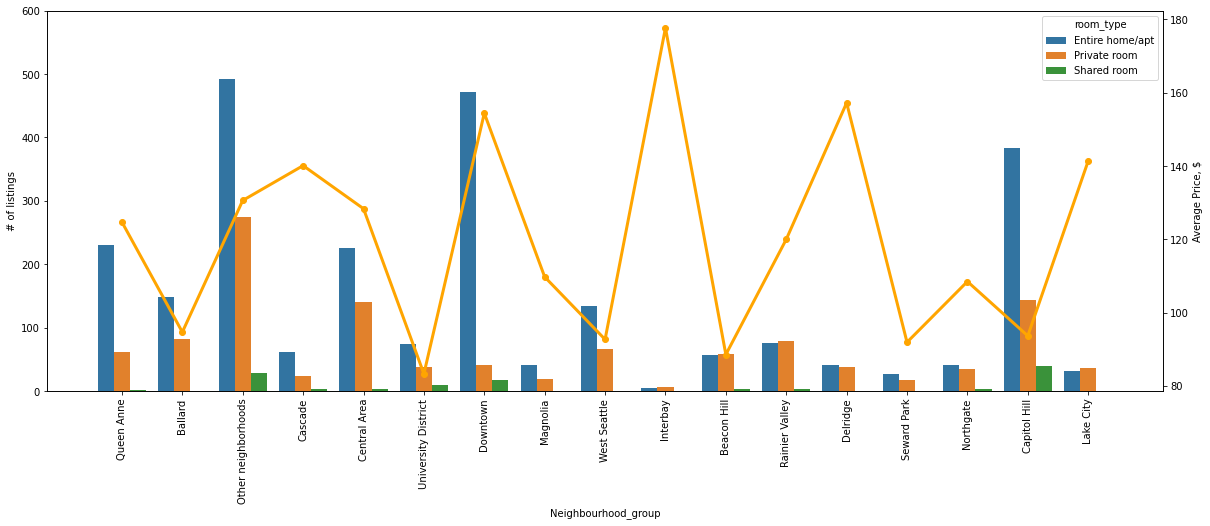

In [304]:
# Check the above hypothesis
plt.figure(figsize=(20,7))
ax = sns.countplot(data=listing, x='neighbourhood_group_cleansed',hue='room_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Neighbourhood_group')
ax.set_ylabel('# of listings')

ax2 = ax.twinx()
ax2.plot(listing.groupby(['neighbourhood_group_cleansed'])['price'].mean(), color='orange', marker ='o', linewidth=3, label='Listing')
ax2.set_ylabel('Average Price, $')

ax.set_ylim(0, 600)
plt.show()

(0.0, 400.0)

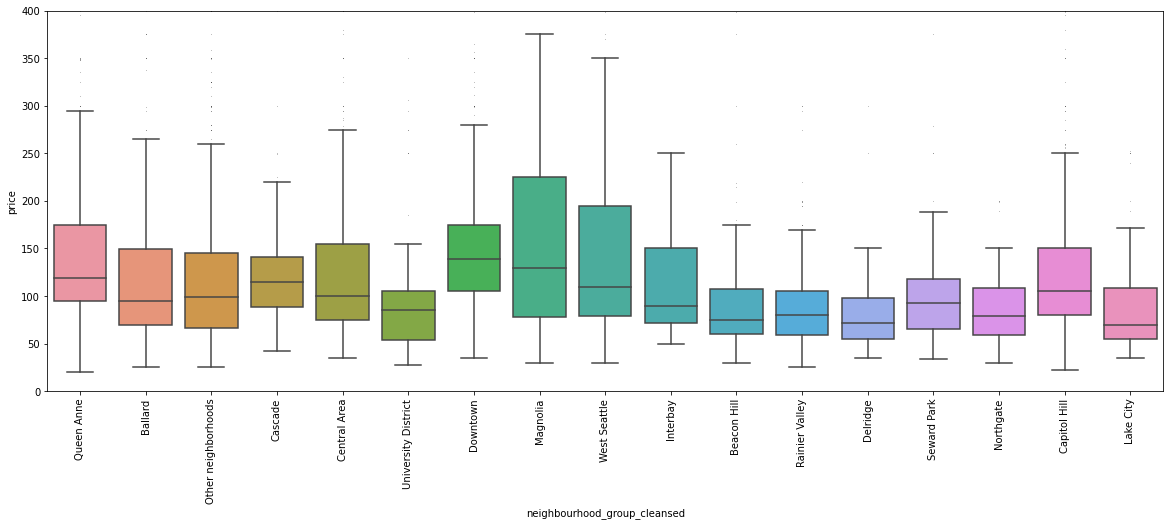

In [305]:
plt.figure(figsize=(20,7))
ax = sns.boxplot(data=listing, x='neighbourhood_group_cleansed',y='price',fliersize=0.1,)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 400)

<AxesSubplot: title={'center': 'Missing values per column'}>

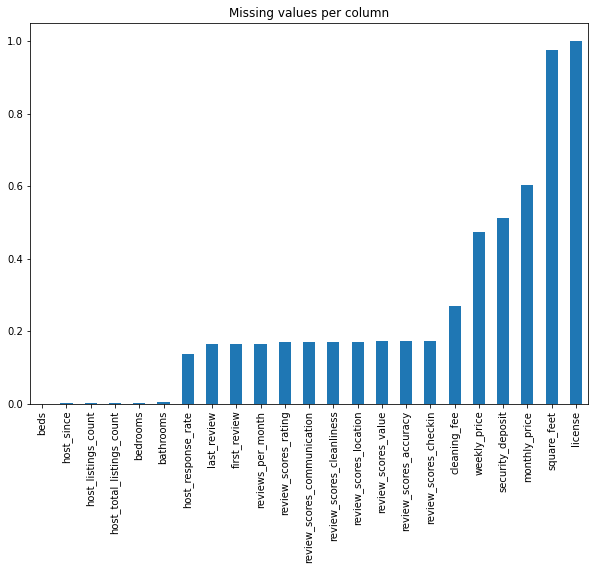

In [306]:
#show columns with high ratio of missing value
plt.figure(figsize=(10,7))
listing_missing = listing.select_dtypes(include=['number']).isnull().mean()
listing_missing[listing_missing >0].sort_values().plot.bar(title='Missing values per column')

In [339]:
listing.security_deposit.describe()

count    1866.000000
mean      287.610397
std       270.222690
min        95.000000
25%       150.000000
50%       250.000000
75%       300.000000
max      5000.000000
Name: security_deposit, dtype: float64

In [308]:
listing.cleaning_fee.describe()

count    2788.000000
mean       61.710904
std        48.830341
min         5.000000
25%        25.000000
50%        50.000000
75%        83.000000
max       300.000000
Name: cleaning_fee, dtype: float64

In [309]:
listing[listing.security_deposit.isnull()==True].price.mean()

113.50665983606558

In [310]:
listing[listing.security_deposit.isnull()==False].price.mean()

143.11254019292605

In [311]:
listing[listing.cleaning_fee.isnull()==True].price.mean()

103.94368932038834

In [312]:
listing[listing.cleaning_fee.isnull()==False].price.mean()

136.85473457675752

In [313]:
df_security_deposit = pd.qcut(listing['security_deposit'], q=10, duplicates='drop')
df_cleaning_fee = pd.qcut(listing['cleaning_fee'], q=10, duplicates='drop')

In [314]:
df_security_deposit = pd.get_dummies(df_security_deposit,prefix='security_deposit',drop_first=True, dummy_na=True)
df_cleaning_fee = pd.get_dummies(df_cleaning_fee,prefix='cleaning_fee',drop_first=True, dummy_na=True)


In [315]:
# Fill missing values with mean for numeric columns except security deposit and cleaning fee
df_num = listing.select_dtypes(include=['number'])
df_num = df_num.drop(['scrape_id','host_id','security_deposit', 'cleaning_fee','monthly_price','weekly_price','square_feet','license'],axis=1)
fill_mean = lambda x:x.fillna(x.mean())
df_num = df_num.apply(fill_mean,axis=0)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3818 non-null   int64  
 1   last_scraped                    3818 non-null   float64
 2   host_since                      3818 non-null   float64
 3   host_response_rate              3818 non-null   float64
 4   host_listings_count             3818 non-null   float64
 5   host_total_listings_count       3818 non-null   float64
 6   latitude                        3818 non-null   float64
 7   longitude                       3818 non-null   float64
 8   accommodates                    3818 non-null   int64  
 9   bathrooms                       3818 non-null   float64
 10  bedrooms                        3818 non-null   float64
 11  beds                            3818 non-null   float64
 12  price                           38

In [316]:
col_drop = ['id','last_scraped','host_response_rate','host_since','host_listings_count','host_total_listings_count',
            'number_of_reviews','first_review','last_review','review_scores_rating',
           'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
           'review_scores_communication','review_scores_location','review_scores_value',
           'calculated_host_listings_count','reviews_per_month']
df_num_pred = df_num.drop(col_drop,axis=1)
df_num_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          3818 non-null   float64
 1   longitude         3818 non-null   float64
 2   accommodates      3818 non-null   int64  
 3   bathrooms         3818 non-null   float64
 4   bedrooms          3818 non-null   float64
 5   beds              3818 non-null   float64
 6   price             3818 non-null   float64
 7   guests_included   3818 non-null   int64  
 8   extra_people      3818 non-null   float64
 9   minimum_nights    3818 non-null   int64  
 10  maximum_nights    3818 non-null   int64  
 11  availability_30   3818 non-null   int64  
 12  availability_60   3818 non-null   int64  
 13  availability_90   3818 non-null   int64  
 14  availability_365  3818 non-null   int64  
dtypes: float64(7), int64(8)
memory usage: 447.5 KB


In [317]:
col_cat_pred = ['neighbourhood_group_cleansed','property_type',
          'bed_type','cancellation_policy','room_type',
           'instant_bookable','require_guest_profile_picture','host_identity_verified',
           'host_has_profile_pic','require_guest_phone_verification']
df_cat_pred = pd.get_dummies(listing[col_cat_pred],prefix_sep='_',drop_first=True, dummy_na=False)


df_cat_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 44 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   neighbourhood_group_cleansed_Beacon Hill          3818 non-null   uint8
 1   neighbourhood_group_cleansed_Capitol Hill         3818 non-null   uint8
 2   neighbourhood_group_cleansed_Cascade              3818 non-null   uint8
 3   neighbourhood_group_cleansed_Central Area         3818 non-null   uint8
 4   neighbourhood_group_cleansed_Delridge             3818 non-null   uint8
 5   neighbourhood_group_cleansed_Downtown             3818 non-null   uint8
 6   neighbourhood_group_cleansed_Interbay             3818 non-null   uint8
 7   neighbourhood_group_cleansed_Lake City            3818 non-null   uint8
 8   neighbourhood_group_cleansed_Magnolia             3818 non-null   uint8
 9   neighbourhood_group_cleansed_Northgate   

In [318]:
y = df_num_pred.price

X = df_num_pred.drop('price',axis=1)
X = pd.concat([X,df_security_deposit],axis=1)
X = pd.concat([X,df_cleaning_fee],axis=1)
X = pd.concat([X,dummies_ame],axis=1)
X = pd.concat([X,df_cat_pred],axis=1)

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
X_train.shape

(2672, 118)

In [320]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()


In [321]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train) 

y_test_pred = lr_model.predict(X_test)
y_train_pred = lr_model.predict(X_train)

# Print model evaluation scores for training and test
print('Traning Data:')
print('r-sqaured score: %.3f' % r2_score(y_train, y_train_pred))
print('mean-sqaured error: %.3f' % mean_squared_error(y_train, y_train_pred))
print('---')
print('Test Data:')
print('r-sqaured score: %.3f' % r2_score(y_test, y_test_pred))
print('mean-sqaured error: %.3f' % mean_squared_error(y_test, y_test_pred))
print('---')

Traning Data:
r-sqaured score: 0.612
mean-sqaured error: 3089.897
---
Test Data:
r-sqaured score: 0.619
mean-sqaured error: 3266.677
---


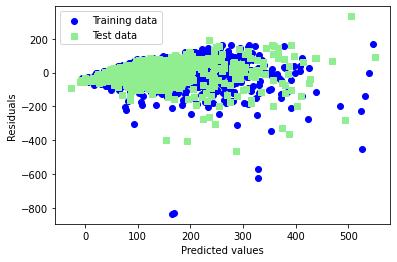

In [322]:
#Print Model's Residuals
plt.scatter(y_train_pred,  y_train_pred - y_train,c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.show()

In [323]:
def coef_weights(coefficients, X):
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X.columns
    coefs_df['coefs'] = lr_model.coef_
    #coefs_df['abs_coefs'] = np.abs(lr_model.coef_)
    coefs_df = coefs_df.sort_values('coefs', ascending=False)
    return coefs_df


In [324]:
#Top20 Positive Coefficiency
coef_df = coef_weights(lr_model.coef_,X)
coef_df.head(20)

,est_int,coefs
4,bedrooms,23.298416
2,accommodates,15.558720
30,"cleaning_fee_(120.0, 300.0]",13.685276
3,bathrooms,12.685521
79,neighbourhood_group_cleansed_Downtown,8.932170
20,"security_deposit_(500.0, 5000.0]",8.742963
75,neighbourhood_group_cleansed_Capitol Hill,8.470230
31,cleaning_fee_nan,7.660315
85,neighbourhood_group_cleansed_Queen Anne,5.957548
91,property_type_Boat,4.617312


In [325]:
#Top 20 Negative Coefficiency
coef_df.sort_values('coefs', ascending=True).head(20)


,est_int,coefs
111,room_type_Private room,-17.714755
112,room_type_Shared room,-13.305808
86,neighbourhood_group_cleansed_Rainier Valley,-5.514957
59,Hangers,-4.234134
0,latitude,-3.255350
78,neighbourhood_group_cleansed_Delridge,-3.205462
11,availability_60,-3.057096
83,neighbourhood_group_cleansed_Northgate,-2.962542
58,24-Hour Check-in,-2.870180
74,neighbourhood_group_cleansed_Beacon Hill,-2.818230
